# INSTALLATION

In [1]:
%matplotlib inline

In [2]:
import sys
from pathlib import Path

# Add src directory to Python path
src_path = "../src"
sys.path.insert(0, str(src_path))

# DATASET AND MODEL

In [7]:
from faex.resources.dataseting import iris

# Load the Iris dataset
df_x, df_class = iris()

# Display the first few rows of the dataset
print(df_x.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

TEST_SIZE = 0.2
RANDOM_STATE = 42
N_ESTIMATORS = 30

# Divide in train and test set
X_train, X_test, y_train, y_test = train_test_split(
    df_x,
    df_class,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

# Train model
model = MLPClassifier(random_state=RANDOM_STATE, max_iter=500, hidden_layer_sizes=(N_ESTIMATORS,))
model.fit(X_train, y_train)

# Evaluate model
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print(f"Accuracy on train set: {r2_train:.3f}")
print(f"Accuracy on test set: {r2_test:.3f}")

Accuracy on train set: 0.975
Accuracy on test set: 1.000


/home/jparisu/assets/py_vir_env/.default_venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Explanations

In [25]:
from faex.classifying.ClassificationDataCore import ClassificationDataCore
from faex.core.ExplanationCore import ExplanationCore

FEATURE = "petal length (cm)"
BINS = 200
PREDICTION_CLASS = "versicolor"

# Generate DataCore
datacore = ClassificationDataCore(
        df_X=df_x,
        model=model,
        study_features=[FEATURE],
        bins=BINS,
        class_label=PREDICTION_CLASS
)

# Generate explainer
explainer = ExplanationCore(datacore=datacore)

# VISUALIZATION

/tmp/ipykernel_74370/189850536.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  visualization.show()


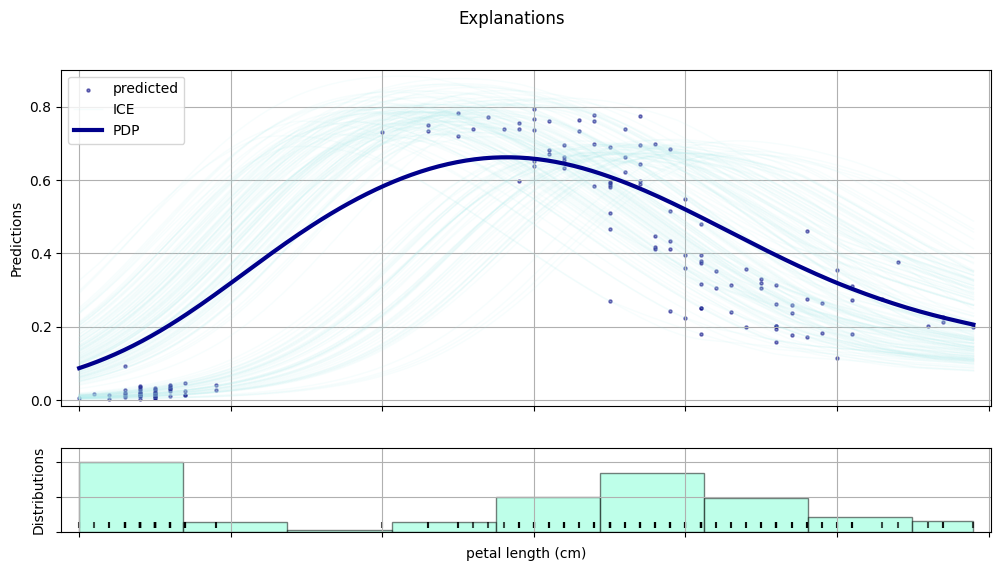

In [26]:
USE_MATPLOTLIB = True

# Explaining PDP
visualization = explainer.visualize_doubleplot(
    explanations=[
        "real-prediction",
        "histogram",
        "distribution",
        "ice",
        "pdp",
        # "pdp-d",
    ],
    matplotlib=USE_MATPLOTLIB,
)

visualization.show()

/tmp/ipykernel_74370/1944085808.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  visualization.show()


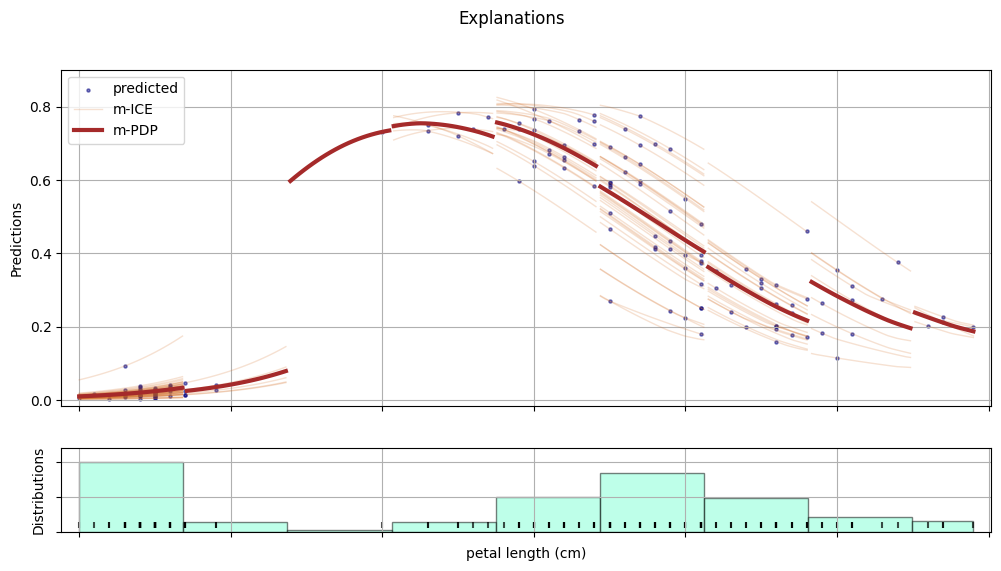

In [27]:
# Explaining PDP
visualization = explainer.visualize_doubleplot(
    explanations=[
        "real-prediction",
        "histogram",
        "distribution",
        "mice",
        "mpdp",
    ],
    matplotlib=USE_MATPLOTLIB,
)

visualization.show()

/tmp/ipykernel_74370/42325560.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  visualization.show()


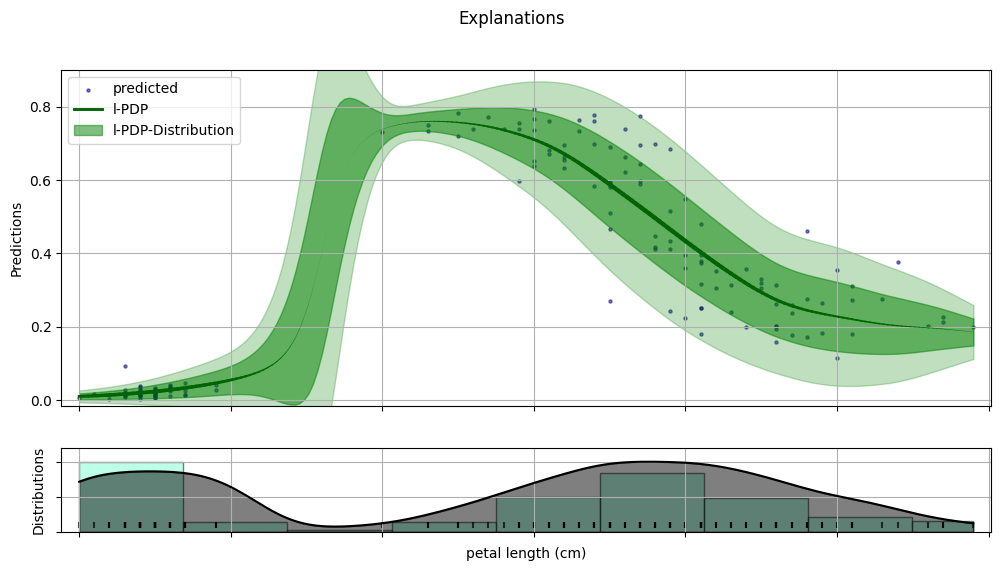

In [28]:
# Explaining l-PDP
visualization = explainer.visualize_doubleplot(
    explanations=[
        "real-prediction",
        "histogram",
        "distribution",
        "KernelNormalizer",
        # "l-ice",
        "l-pdp",
        "l-pdp-d",
    ],
    matplotlib=USE_MATPLOTLIB,
)

visualization.show()

/tmp/ipykernel_74370/1944500167.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  visualization.show()


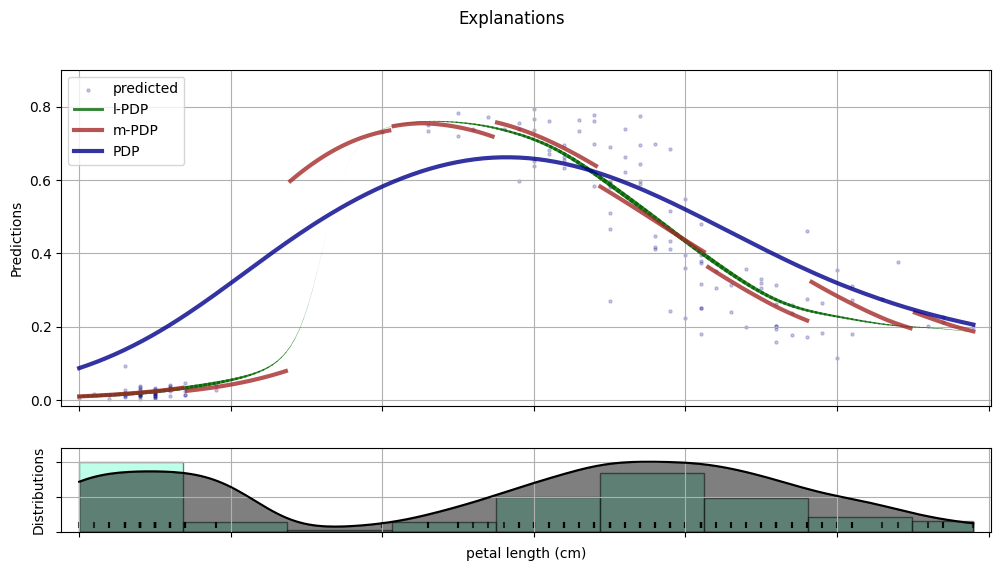

In [29]:
# Joint Explanations with arguments
visualization = explainer.visualize_doubleplot(
    explanations=[
        "real-prediction",
        "histogram",
        "distribution",
        "KernelNormalizer",
        "l-pdp",
        "m-pdp",
        "pdp",
    ],
    plot_arguments={
        "real-prediction" : {"alpha": 0.2},
        "l-pdp": {'alpha': 0.8},
        "m-pdp": {'alpha': 0.8},
        "pdp": {'alpha': 0.8},
    },
    matplotlib=USE_MATPLOTLIB,
)

visualization.show()